In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)
import streamlit as st

In [3]:
df_trainData=pd.read_excel("House_Rent_Train.xlsx")
df_trainData.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [4]:
df_trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [5]:
dftr=df_trainData.drop(['id',"activation_date","latitude","longitude","negotiable","facing","amenities","lease_type","cup_board","building_type","balconies","total_floor","floor","furnishing"],axis='columns')

In [6]:
dftr.head()

,type,locality,gym,lift,swimming_pool,parking,property_size,property_age,bathroom,water_supply,rent
0,BHK2,NaN,1,1,1,BOTH,1250,25.0,2.0,CORP_BORE,40000.0
1,BHK2,Bellandur,0,1,0,BOTH,1400,4.0,2.0,CORPORATION,22000.0
2,BHK3,Thiruvanmiyur,0,1,0,BOTH,1350,6.0,3.0,CORP_BORE,28000.0
3,BHK1,Attiguppe,0,0,0,TWO_WHEELER,600,3.0,1.0,CORPORATION,8000.0
4,BHK3,Kodihalli,0,0,0,BOTH,1500,15.0,3.0,CORPORATION,45000.0


In [7]:
dftr.isnull().sum()

type              27
locality         160
gym                0
lift               0
swimming_pool      0
parking            0
property_size      0
property_age      23
bathroom          23
water_supply      23
rent              23
dtype: int64

In [8]:
dftr2=dftr.dropna()

In [9]:
dftr2.isnull().sum()

type             0
locality         0
gym              0
lift             0
swimming_pool    0
parking          0
property_size    0
property_age     0
bathroom         0
water_supply     0
rent             0
dtype: int64

In [10]:
dftr2['bathroom'].unique()

array([ 2.,  3.,  1.,  4.,  5., 21.,  6.,  7.])

In [11]:
dftr2[dftr2.bathroom>10]

,type,locality,gym,lift,swimming_pool,parking,property_size,property_age,bathroom,water_supply,rent
2431,BHK3,Ejipura,0,0,0,TWO_WHEELER,1100,5.0,21.0,CORP_BORE,27000.0


In [12]:
dftr3=dftr2[dftr2.bathroom<10]

In [13]:
dftr3.head(3)

,type,locality,gym,lift,swimming_pool,parking,property_size,property_age,bathroom,water_supply,rent
1,BHK2,Bellandur,0,1,0,BOTH,1400,4.0,2.0,CORPORATION,22000.0
2,BHK3,Thiruvanmiyur,0,1,0,BOTH,1350,6.0,3.0,CORP_BORE,28000.0
3,BHK1,Attiguppe,0,0,0,TWO_WHEELER,600,3.0,1.0,CORPORATION,8000.0


In [14]:
dftr3.shape

(20376, 11)

In [15]:
len(dftr3['locality'].unique()) #high dimension

1917

In [16]:
dftr3.locality=dftr3.locality.apply(lambda x: x.strip())
location_stats=dftr3.groupby('locality')['locality'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\ramac\AppData\Local\Temp\ipykernel_11956\2732060646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftr3.locality=dftr3.locality.apply(lambda x: x.strip())


locality
Whitefield                                                   900
HSR Layout                                                   682
Banashankari                                                 644
Marathahalli                                                 473
Bellandur                                                    433
                                                            ... 
Hoodi , Saketha Nagar, Hoodi, Bengaluru, Karnataka, India      1
Hoodi ,                                                        1
Hemanth Nagar                                                  1
Heggondahalli, Gunjur Post                                     1
wilson garden                                                  1
Name: locality, Length: 1917, dtype: int64

In [17]:
location_stats_less_10=location_stats[location_stats<=10]
location_stats_less_10

locality
Bhuvaneshwari Nagar                                          10
B Narayanapura,Mahadevapura                                  10
LBS Nagar                                                    10
Kodipur                                                      10
Jagadenahalli                                                10
                                                             ..
Hoodi , Saketha Nagar, Hoodi, Bengaluru, Karnataka, India     1
Hoodi ,                                                       1
Hemanth Nagar                                                 1
Heggondahalli, Gunjur Post                                    1
wilson garden                                                 1
Name: locality, Length: 1691, dtype: int64

In [18]:
dftr3.locality=dftr3.locality.apply(lambda x: "other" if x in location_stats_less_10 else x)
len(dftr3.locality.unique())

C:\Users\ramac\AppData\Local\Temp\ipykernel_11956\3266769000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftr3.locality=dftr3.locality.apply(lambda x: "other" if x in location_stats_less_10 else x)


227

In [19]:
dftr3['bhk'] = dftr3['type'].str.extract('(\d+)').astype(int)

C:\Users\ramac\AppData\Local\Temp\ipykernel_11956\1730434956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftr3['bhk'] = dftr3['type'].str.extract('(\d+)').astype(int)


In [20]:
dftr3.head(15)

,type,locality,gym,lift,swimming_pool,parking,property_size,property_age,bathroom,water_supply,rent,bhk
1,BHK2,Bellandur,0,1,0,BOTH,1400,4.0,2.0,CORPORATION,22000.0,2
2,BHK3,other,0,1,0,BOTH,1350,6.0,3.0,CORP_BORE,28000.0,3
3,BHK1,Attiguppe,0,0,0,TWO_WHEELER,600,3.0,1.0,CORPORATION,8000.0,1
4,BHK3,Kodihalli,0,0,0,BOTH,1500,15.0,3.0,CORPORATION,45000.0,3
5,BHK1,"Seetharampalya,Hoodi",1,1,1,BOTH,1080,0.0,2.0,CORP_BORE,18000.0,1
6,BHK3,"Narayanappa Garden,Whitefield",1,1,1,BOTH,1895,5.0,3.0,CORPORATION,32000.0,3
7,BHK2,HSR Layout 5th Sector,0,0,0,BOTH,1000,10.0,2.0,CORP_BORE,22000.0,2
8,BHK2,Banashankari,0,0,0,NONE,900,10.0,2.0,CORPORATION,10000.0,2
9,BHK2,Whitefield,1,1,0,BOTH,1290,4.0,2.0,CORP_BORE,19500.0,2
10,BHK2,RR Nagar,0,0,0,BOTH,1200,2.0,2.0,CORPORATION,12500.0,2


In [21]:
dftr4=dftr3.copy()

In [22]:
dftr4['Price_per_sqft']=dftr4['rent']/dftr4['property_size']
dftr4.head()

,type,locality,gym,lift,swimming_pool,parking,property_size,property_age,bathroom,water_supply,rent,bhk,Price_per_sqft
1,BHK2,Bellandur,0,1,0,BOTH,1400,4.0,2.0,CORPORATION,22000.0,2,15.714286
2,BHK3,other,0,1,0,BOTH,1350,6.0,3.0,CORP_BORE,28000.0,3,20.740741
3,BHK1,Attiguppe,0,0,0,TWO_WHEELER,600,3.0,1.0,CORPORATION,8000.0,1,13.333333
4,BHK3,Kodihalli,0,0,0,BOTH,1500,15.0,3.0,CORPORATION,45000.0,3,30.000000
5,BHK1,"Seetharampalya,Hoodi",1,1,1,BOTH,1080,0.0,2.0,CORP_BORE,18000.0,1,16.666667


In [23]:
dftr4[dftr4.property_size/dftr4.bhk<300].head()

,type,locality,gym,lift,swimming_pool,parking,property_size,property_age,bathroom,water_supply,rent,bhk,Price_per_sqft
29,BHK2,other,0,0,0,NONE,500,10.0,1.0,CORP_BORE,9000.0,2,18.000000
32,RK1,Indiranagar,0,0,0,TWO_WHEELER,250,10.0,1.0,CORPORATION,11000.0,1,44.000000
34,RK1,Brookefield,0,0,0,TWO_WHEELER,250,0.0,1.0,CORPORATION,9000.0,1,36.000000
51,RK1,Indiranagar,0,0,0,TWO_WHEELER,120,5.0,1.0,CORP_BORE,8000.0,1,66.666667
55,BHK1,Vijaya Nagar,0,0,0,TWO_WHEELER,225,8.0,1.0,CORPORATION,8400.0,1,37.333333


In [24]:
dftr4.shape

(20376, 13)

In [25]:
dftr5=dftr4[~(dftr4.property_size/dftr4.bhk<300)]
dftr5.shape

(19808, 13)

In [26]:
dftr5.rent.describe()

count    19808.000000
mean     19254.755402
std       8430.511079
min       8000.000000
25%      13000.000000
50%      18000.000000
75%      24000.000000
max      50000.000000
Name: rent, dtype: float64

In [27]:
#scatter plot
def plot_scatter(df,locality):
    bhk2=df[(df.locality==locality)&(df.bhk==2)]
    bhk3=df[(df.locality==locality)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.property_size,bhk2.rent,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.property_size,bhk3.rent,marker='+',color='red',label='3 BHK',s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price per Square feet")
    plt.title(locality)
    plt.legend()

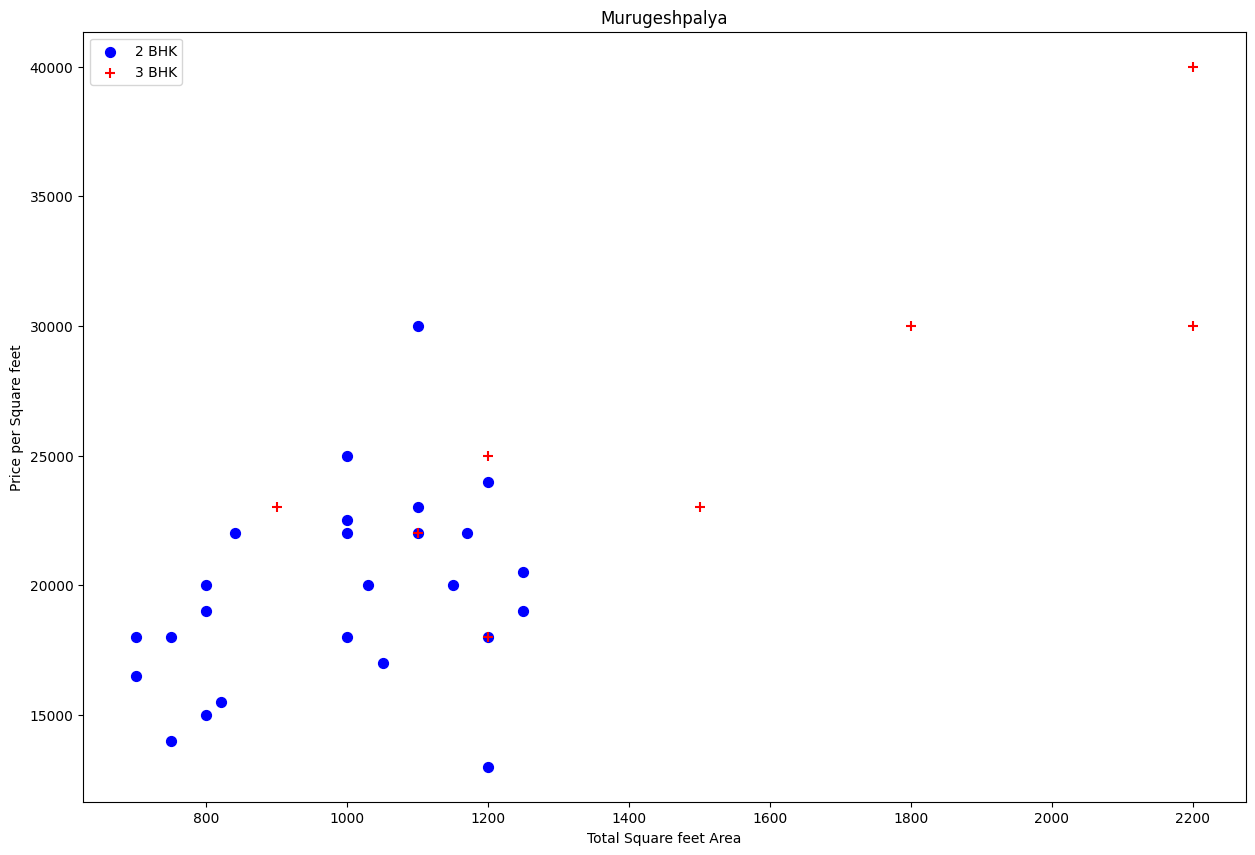

In [28]:
plot_scatter(dftr5,"Murugeshpalya")

Text(0, 0.5, 'Count')

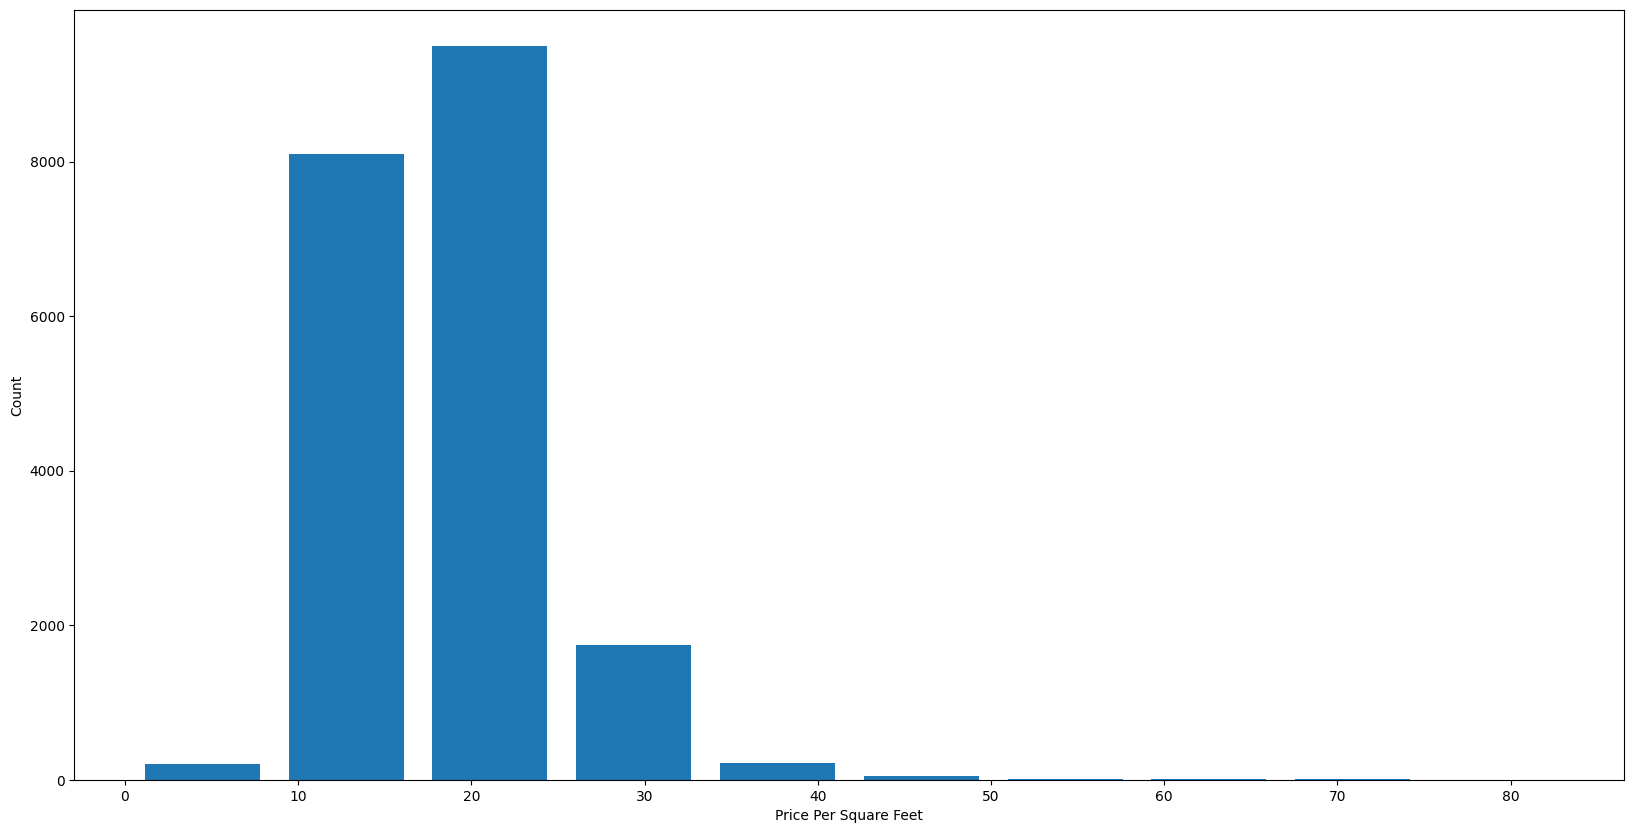

In [29]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(dftr5.Price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count') 

Text(0, 0.5, 'Count')

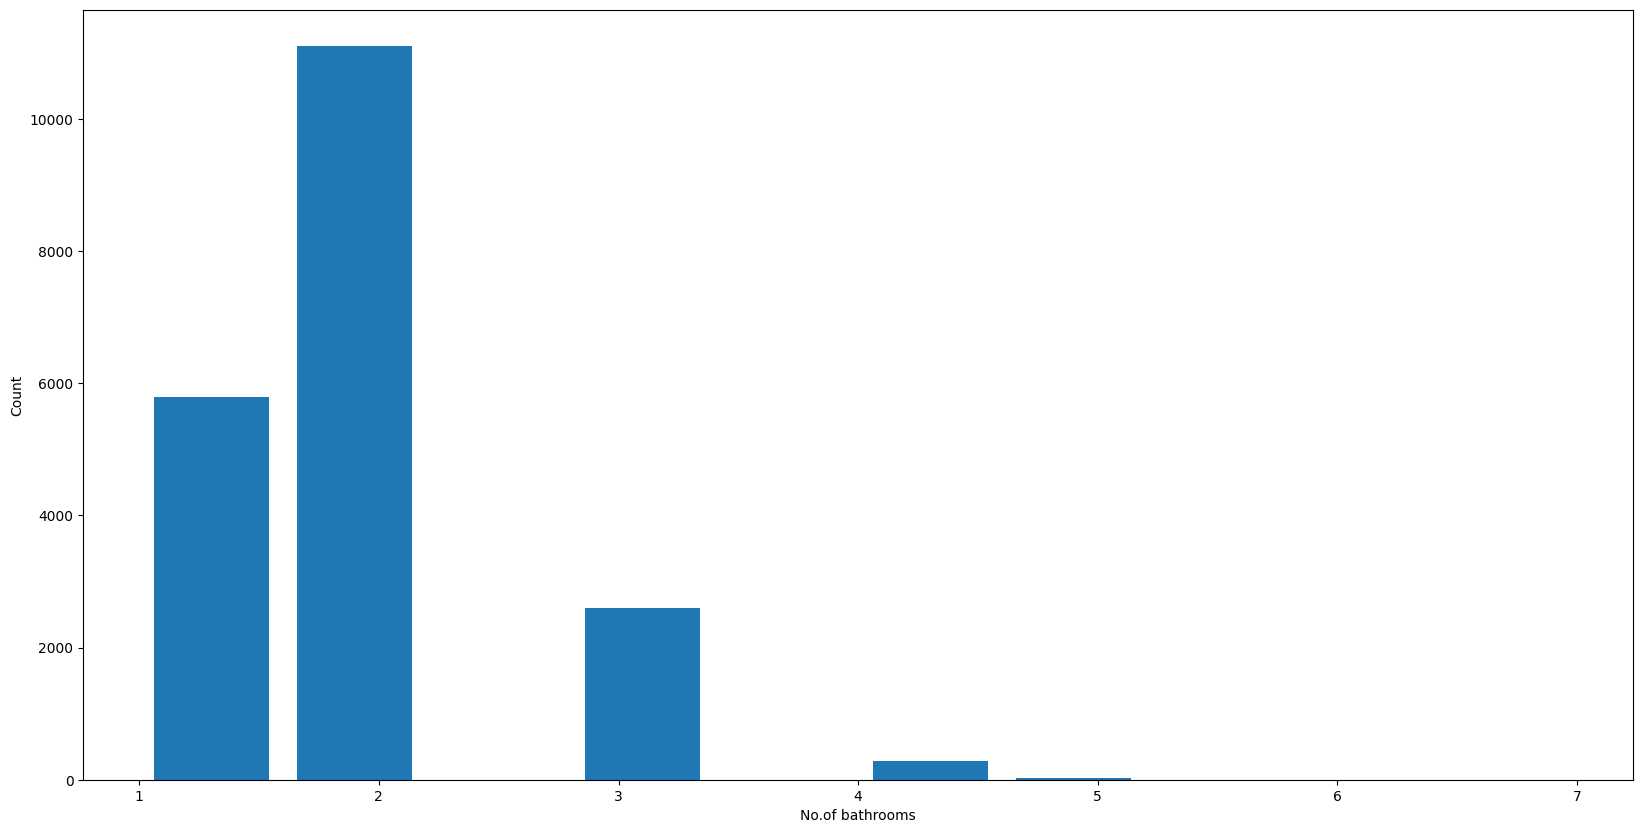

In [30]:
plt.hist(dftr5.bathroom,rwidth=0.8)
plt.xlabel('No.of bathrooms')
plt.ylabel('Count') 

In [31]:
dftr5.shape

(19808, 13)

In [32]:
location_dummies=pd.get_dummies(dftr5.locality)
location_dummies.head()

,"1st Sector,HSR Layout",AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",Annapurneshwari Nagar,Ashok Nagar,Attiguppe,B Narayanapura,BTM 1st Stage,...,Vijayanagar,Vimanapura,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,other
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
dftr6=dftr5.drop(['type','parking'],axis='columns')
dftr6.head()

,locality,gym,lift,swimming_pool,property_size,property_age,bathroom,water_supply,rent,bhk,Price_per_sqft
1,Bellandur,0,1,0,1400,4.0,2.0,CORPORATION,22000.0,2,15.714286
2,other,0,1,0,1350,6.0,3.0,CORP_BORE,28000.0,3,20.740741
3,Attiguppe,0,0,0,600,3.0,1.0,CORPORATION,8000.0,1,13.333333
4,Kodihalli,0,0,0,1500,15.0,3.0,CORPORATION,45000.0,3,30.000000
5,"Seetharampalya,Hoodi",1,1,1,1080,0.0,2.0,CORP_BORE,18000.0,1,16.666667


In [34]:
water_dummies=pd.get_dummies(dftr6.water_supply)
water_dummies.head()

,BOREWELL,CORPORATION,CORP_BORE
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False
5,False,False,True


In [35]:
dftr6.water_supply.unique()

array(['CORPORATION', 'CORP_BORE', 'BOREWELL'], dtype=object)

In [36]:
dftr7=pd.concat([dftr6,location_dummies.drop('other',axis='columns')],axis='columns')
dftr7.head(3)

,locality,gym,lift,swimming_pool,property_size,property_age,bathroom,water_supply,rent,bhk,...,Vijaya Nagar,Vijayanagar,Vimanapura,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur
1,Bellandur,0,1,0,1400,4.0,2.0,CORPORATION,22000.0,2,...,False,False,False,False,False,False,False,False,False,False
2,other,0,1,0,1350,6.0,3.0,CORP_BORE,28000.0,3,...,False,False,False,False,False,False,False,False,False,False
3,Attiguppe,0,0,0,600,3.0,1.0,CORPORATION,8000.0,1,...,False,False,False,False,False,False,False,False,False,False


In [37]:
dftr8=pd.concat([dftr7,water_dummies],axis='columns')
dftr8.head(3)

,locality,gym,lift,swimming_pool,property_size,property_age,bathroom,water_supply,rent,bhk,...,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,BOREWELL,CORPORATION,CORP_BORE
1,Bellandur,0,1,0,1400,4.0,2.0,CORPORATION,22000.0,2,...,False,False,False,False,False,False,False,False,True,False
2,other,0,1,0,1350,6.0,3.0,CORP_BORE,28000.0,3,...,False,False,False,False,False,False,False,False,False,True
3,Attiguppe,0,0,0,600,3.0,1.0,CORPORATION,8000.0,1,...,False,False,False,False,False,False,False,False,True,False


In [38]:
dftr9=dftr8.drop(['locality','water_supply','gym','swimming_pool','property_age','lift'],axis='columns')
dftr9.head()

,property_size,bathroom,rent,bhk,Price_per_sqft,"1st Sector,HSR Layout",AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",...,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,BOREWELL,CORPORATION,CORP_BORE
1,1400,2.0,22000.0,2,15.714286,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1350,3.0,28000.0,3,20.740741,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,600,1.0,8000.0,1,13.333333,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1500,3.0,45000.0,3,30.000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,1080,2.0,18000.0,1,16.666667,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [39]:
dftr9.shape

(19808, 234)

In [40]:
X=dftr9.drop('rent',axis='columns')
X.head()

,property_size,bathroom,bhk,Price_per_sqft,"1st Sector,HSR Layout",AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",Annapurneshwari Nagar,...,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,BOREWELL,CORPORATION,CORP_BORE
1,1400,2.0,2,15.714286,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1350,3.0,3,20.740741,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,600,1.0,1,13.333333,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1500,3.0,3,30.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,1080,2.0,1,16.666667,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [41]:
y=dftr9.rent
y.head()

1    22000.0
2    28000.0
3     8000.0
4    45000.0
5    18000.0
Name: rent, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8102968731760528

In [47]:
dftr9.head(2)

,property_size,bathroom,rent,bhk,Price_per_sqft,"1st Sector,HSR Layout",AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",...,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,BOREWELL,CORPORATION,CORP_BORE
1,1400,2.0,22000.0,2,15.714286,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1350,3.0,28000.0,3,20.740741,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [48]:
def Predict_rent(locality,property_size,bath,bhk):
    loc_index=np.where(X.columns==locality)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=property_size
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
        
    return lr_clf.predict([x])[0]

In [49]:
location_dummies

,"1st Sector,HSR Layout",AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",Annapurneshwari Nagar,Ashok Nagar,Attiguppe,B Narayanapura,BTM 1st Stage,...,Vijayanagar,Vimanapura,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,other
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
Predict_rent('Whitefield',1200,2,2)

d:\vscode\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8635.867042520273

In [51]:
Predict_rent('Whitefield',1200,3,3)

d:\vscode\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


16528.225705930396

In [52]:
Predict_rent('Murgesh Pallya',1200,3,3)

d:\vscode\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


16768.779801176723